In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

grocery_items_file = r"C:\Users\kaushal\Downloads\Grocery_Items_51.csv"
data = pd.read_csv(grocery_items_file)

columns_range = [str(i) for i in range(11)]

transactions_columns = [str(i) for i in range(11)]

transactions = data[transactions_columns].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

te = TransactionEncoder()
te_ary = te.fit(transactions.str.split(',')).transform(transactions.str.split(','))
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
min_support = 0.01
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
min_confidence = 0.1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print(rules)


          antecedents         consequents  antecedent support  \
0        (rolls/buns)  (other vegetables)            0.110875   
1              (soda)  (other vegetables)            0.098250   
2  (other vegetables)        (whole milk)            0.120750   
3        (rolls/buns)        (whole milk)            0.110875   
4              (soda)        (whole milk)            0.098250   
5            (yogurt)        (whole milk)            0.087875   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.120750  0.011625    0.104848  0.868305 -0.001763    0.982235   
1            0.120750  0.010125    0.103053  0.853445 -0.001739    0.980270   
2            0.163625  0.014500    0.120083  0.733890 -0.005258    0.950516   
3            0.163625  0.015375    0.138670  0.847485 -0.002767    0.971027   
4            0.163625  0.014125    0.143766  0.878630 -0.001951    0.976806   
5            0.163625  0.012375    0.140825  0.860657 -0.002004    0.9

In [14]:

msv_values = [0.001, 0.005, 0.01, 0.05]
mct_values = [0.05, 0.075, 0.1]

for msv in msv_values:
    for mct in mct_values:
        frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
        
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        
        print(f"Minimum Support: {msv}, Minimum Confidence Threshold: {mct}")
        print(f"Number of Association Rules: {len(rules)}")
        print("\n")


Minimum Support: 0.001, Minimum Confidence Threshold: 0.05
Number of Association Rules: 568


Minimum Support: 0.001, Minimum Confidence Threshold: 0.075
Number of Association Rules: 333


Minimum Support: 0.001, Minimum Confidence Threshold: 0.1
Number of Association Rules: 183


Minimum Support: 0.005, Minimum Confidence Threshold: 0.05
Number of Association Rules: 69


Minimum Support: 0.005, Minimum Confidence Threshold: 0.075
Number of Association Rules: 56


Minimum Support: 0.005, Minimum Confidence Threshold: 0.1
Number of Association Rules: 33


Minimum Support: 0.01, Minimum Confidence Threshold: 0.05
Number of Association Rules: 12


Minimum Support: 0.01, Minimum Confidence Threshold: 0.075
Number of Association Rules: 12


Minimum Support: 0.01, Minimum Confidence Threshold: 0.1
Number of Association Rules: 6


Minimum Support: 0.05, Minimum Confidence Threshold: 0.05
Number of Association Rules: 0


Minimum Support: 0.05, Minimum Confidence Threshold: 0.075
Number of Asso

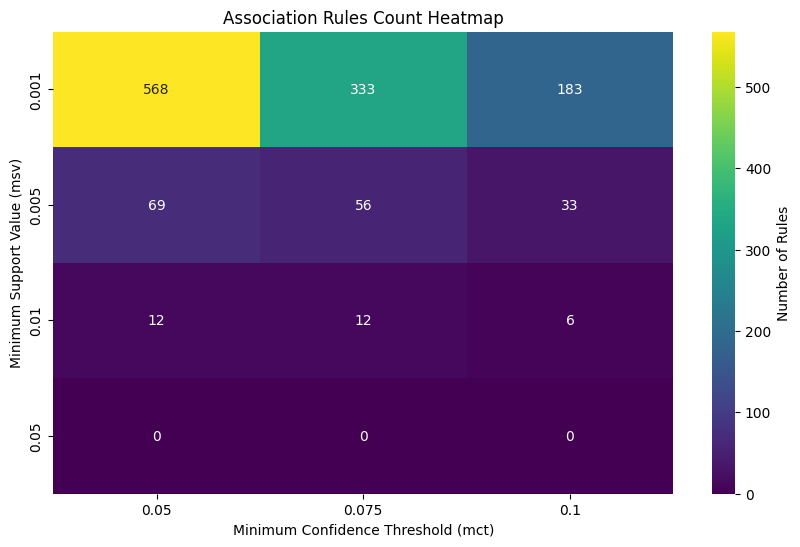

In [17]:

msv_values = [0.001, 0.005, 0.01, 0.05]
mct_values = [0.05, 0.075, 0.1]

count_df = pd.DataFrame(index=msv_values, columns=mct_values, dtype=float)  

for msv in msv_values:
    for mct in mct_values:
        
        frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
        
   
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        
     
        count_df.loc[msv, mct] = len(rules)

count_df = count_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(count_df, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Number of Rules'})
plt.title('Association Rules Count Heatmap')
plt.xlabel('Minimum Confidence Threshold (mct)')
plt.ylabel('Minimum Support Value (msv)')
plt.show()


In [18]:

te = TransactionEncoder()
te_ary = te.fit(transactions.str.split(',')).transform(transactions.str.split(','))
df = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 0.005
min_confidence = 0.05 

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

rules_sorted = rules.sort_values(by='confidence', ascending=False)

highest_confidence_rules = rules_sorted[rules_sorted['support'] == min_support].head(1)

print("Association Rule(s) with the Highest Confidence:")
print(highest_confidence_rules[['antecedents', 'consequents', 'confidence']])


Association Rule(s) with the Highest Confidence:
                antecedents   consequents  confidence
18  (fruit/vegetable juice)  (whole milk)    0.155039


as per the output the confidence value is 0.155039

Found 487 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Epoch 1/20
24/24 [==============================] - 4s 149ms/step - loss: 2.4176 - accuracy: 0.2762 - val_loss: 1.3970 - val_accuracy: 0.2750
Epoch 2/20
24/24 [==============================] - 2s 100ms/step - loss: 1.3861 - accuracy: 0.2463 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/20
24/24 [==============================] - 2s 87ms/step - loss: 1.3848 - accuracy: 0.2548 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/20
24/24 [==============================] - 2s 90ms/step - loss: 1.3737 - accuracy: 0.2698 - val_loss: 1.3370 - val_accuracy: 0.3083
Epoch 5/20
24/24 [==============================] - 2s 91ms/step - loss: 1.3137 - accuracy: 0.3233 - val_loss: 1.4944 - val_accuracy: 0.3500
Epoch 6/20
24/24 [==============================] - 2s 86ms/step - loss: 1.3547 - accuracy: 0.2805 - val_loss: 1.3867 - val_accuracy: 0.2500
Epoch 7/20
24/24 [==============================] - 2s 88ms/step - los

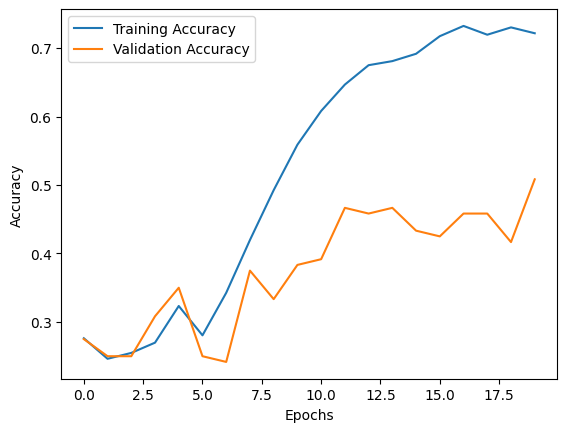

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import matplotlib.pyplot as plt

dataset_path = Path(r"C:\Users\kaushal\Pictures\New folder")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)
score_3x3 = model.evaluate(validation_generator, verbose=0)
print("Filter Size 3x3 Model - Validation Loss:", score_3x3[0])
print("Filter Size 3x3 Model - Validation Accuracy:", score_3x3[1])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Banner Id 916465873 so im performing (a)

Epoch 1/20
24/24 [==============================] - 4s 136ms/step - loss: 1.7789 - accuracy: 0.2463 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/20
24/24 [==============================] - 2s 92ms/step - loss: 1.3869 - accuracy: 0.2570 - val_loss: 1.3865 - val_accuracy: 0.2417
Epoch 3/20
24/24 [==============================] - 2s 90ms/step - loss: 1.3822 - accuracy: 0.2591 - val_loss: 1.3874 - val_accuracy: 0.2417
Epoch 4/20
24/24 [==============================] - 2s 90ms/step - loss: 1.3566 - accuracy: 0.3041 - val_loss: 1.3967 - val_accuracy: 0.2417
Epoch 5/20
24/24 [==============================] - 2s 90ms/step - loss: 1.2976 - accuracy: 0.3512 - val_loss: 1.3781 - val_accuracy: 0.2833
Epoch 6/20
24/24 [==============================] - 2s 92ms/step - loss: 1.1915 - accuracy: 0.3983 - val_loss: 1.3869 - val_accuracy: 0.3000
Epoch 7/20
24/24 [==============================] - 2s 96ms/step - loss: 1.1366 - accuracy: 0.4518 - val_loss: 1.3804 - val_accuracy: 0.2833
Epoch 8/20
2

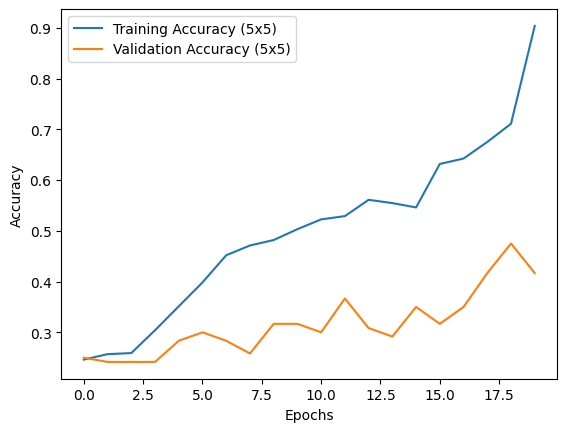

Filter Size 5x5 Model - Validation Loss: 2.099055528640747
Filter Size 5x5 Model - Validation Accuracy: 0.4166666567325592


In [36]:

model_5x5 = models.Sequential()
model_5x5.add(layers.Conv2D(8, (5, 5), activation='relu', input_shape=(256, 256, 3)))
model_5x5.add(layers.MaxPooling2D((2, 2)))
model_5x5.add(layers.Flatten())
model_5x5.add(layers.Dense(16, activation='relu'))
model_5x5.add(layers.Dense(4, activation='softmax'))

model_5x5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_5x5 = model_5x5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

plt.plot(history_5x5.history['accuracy'], label='Training Accuracy (5x5)')
plt.plot(history_5x5.history['val_accuracy'], label='Validation Accuracy (5x5)')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

score_5x5 = model_5x5.evaluate(validation_generator, verbose=0)
print("Filter Size 5x5 Model - Validation Loss:", score_5x5[0])
print("Filter Size 5x5 Model - Validation Accuracy:", score_5x5[1])



Epoch 1/20
24/24 [==============================] - 3s 116ms/step - loss: 5.1502 - accuracy: 0.2398 - val_loss: 1.3889 - val_accuracy: 0.2417
Epoch 2/20
24/24 [==============================] - 2s 103ms/step - loss: 1.3801 - accuracy: 0.2719 - val_loss: 1.3870 - val_accuracy: 0.2417
Epoch 3/20
24/24 [==============================] - 2s 102ms/step - loss: 1.3666 - accuracy: 0.3726 - val_loss: 1.3937 - val_accuracy: 0.2583
Epoch 4/20
24/24 [==============================] - 2s 105ms/step - loss: 1.2966 - accuracy: 0.4283 - val_loss: 1.3639 - val_accuracy: 0.3250
Epoch 5/20
24/24 [==============================] - 2s 102ms/step - loss: 1.0455 - accuracy: 0.6424 - val_loss: 1.3572 - val_accuracy: 0.3417
Epoch 6/20
24/24 [==============================] - 2s 102ms/step - loss: 0.8267 - accuracy: 0.7730 - val_loss: 1.5164 - val_accuracy: 0.3500
Epoch 7/20
24/24 [==============================] - 2s 99ms/step - loss: 0.5554 - accuracy: 0.8544 - val_loss: 1.4005 - val_accuracy: 0.3667
Epoch 8

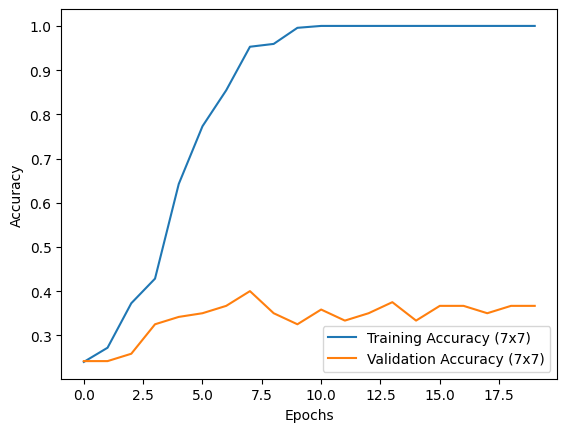

In [37]:

model_7x7 = models.Sequential()
model_7x7.add(layers.Conv2D(8, (7, 7), activation='relu', input_shape=(256, 256, 3)))
model_7x7.add(layers.MaxPooling2D((2, 2)))
model_7x7.add(layers.Flatten())
model_7x7.add(layers.Dense(16, activation='relu'))
model_7x7.add(layers.Dense(4, activation='softmax'))

model_7x7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_7x7 = model_7x7.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

score_7x7 = model_7x7.evaluate(validation_generator, verbose=0)
print("Filter Size 7x7 Model - Validation Loss:", score_7x7[0])
print("Filter Size 7x7 Model - Validation Accuracy:", score_7x7[1])


plt.plot(history_7x7.history['accuracy'], label='Training Accuracy (7x7)')
plt.plot(history_7x7.history['val_accuracy'], label='Validation Accuracy (7x7)')
 

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


When i train my three models from that i can observe that The 3x3 filter model achieved the lowest validation loss, indicating better generalization on the validation set compared to the other models.
The 5x5 and 7x7 filter models have higher validation losses, with the 7x7 model having the highest, suggesting potential overfitting or lack of generalization.The 3x3 filter model achieved the highest validation accuracy at 50.83%, indicating better performance on classifying unseen data.
The 5x5 filter model had a slightly lower accuracy of 41.67%, suggesting it may not generalize as well as the 3x3 filter model.
The 7x7 filter model had the lowest accuracy at 36.67%, indicating potential overfitting or inadequate learning.